# Project Title : Flight Price Prediction Main
## Quantitative
## A quantitative variable is a variable that reflects a notion of magnitude, that is, if the values it can take are numbers. A quantitative variable represents thus a measure and is numerical.

## Quantitative variables are divided into two types: discrete and continuous. The difference is explained in the following two sections.

## Discrete
## Quantitative discrete variables are variables for which the values it can take are countable and have a finite number of possibilities. The values are often (but not always) integers. Here are some examples of discrete variables:

## Continuous
## On the other hand, quantitative continuous variables are variables for which the values are not countable and have an infinite number of possibilities. For example: Age,Weight,Height  

## Qualitative
## In opposition to quantitative variables, qualitative variables (also referred as categorical variables or factors in R) are variables that are not numerical and which values fits into categories.

## In other words, a qualitative variable is a variable which takes as its values modalities, categories or even levels, in contrast to quantitative variables which measure a quantity on each individual.

## Qualitative variables are divided into two types: nominal and ordinal.
## Nominal
## A qualitative nominal variable is a qualitative variable where no ordering is possible or implied in the levels.

## For example, the variable gender is nominal because there is no order in the levels (no matter how many levels you consider for the gender—only two with female/male, or more than two with female/male/ungendered/others, levels are unordered). Eye color is another example of a nominal variable because there is no order among blue, brown or green eyes.

## Ordinal
## On the other hand, a qualitative ordinal variable is a qualitative variable with an order implied in the levels. For instance, if the severity of road accidents has been measured on a scale such as light, moderate and fatal accidents, this variable is a qualitative ordinal variable because there is a clear order in the levels.

## Another good example is health, which can take values such as poor, reasonable, good, or excellent. Again, there is a clear order in these levels so health is in this case a qualitative ordinal variable

## Nominal : 
1. airline
2. source_city
3. departure_time
4. stops
5. arrival_time
6. destination_city
7. flight
## Ordinal :
8. class

## DISCRETE: 
9. days_left
10. price

## Continuous : 
11. duration


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.metrics import r2_score,mean_squared_error

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
import xgboost as xgb

In [13]:
from sklearn.tree import DecisionTreeRegressor 

In [14]:
from sklearn.metrics import r2_score

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
from sklearn.ensemble import ExtraTreesRegressor

In [17]:
df=pd.read_csv('Flight_price_Dataset.csv')

In [18]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [19]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [20]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [21]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [22]:
df.drop_duplicates()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [23]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [24]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

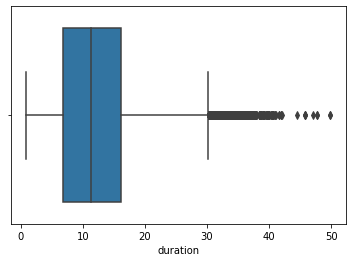

In [25]:
sns.boxplot(df['duration'])

In [26]:
q1=df['duration'].quantile(0.25)


In [27]:
q3=df['duration'].quantile(0.75)

In [28]:
IQR=q3-q1

In [29]:
lower=q1-1.5*IQR

In [30]:
upper=q3+1.5*IQR

In [31]:
df=df[(df['duration']>lower) & (df['duration']<upper)]

In [32]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

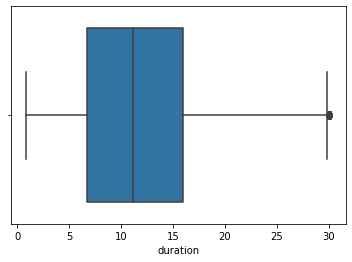

In [33]:
sns.boxplot(df['duration'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_left'>

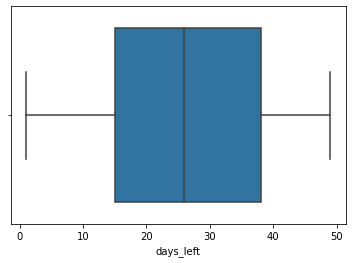

In [34]:
sns.boxplot(df['days_left'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

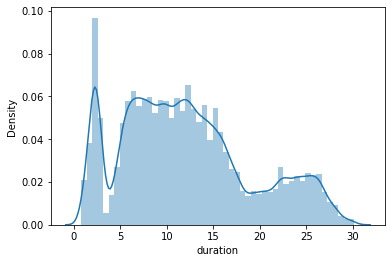

In [35]:
sns.distplot(df['duration'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_left', ylabel='Density'>

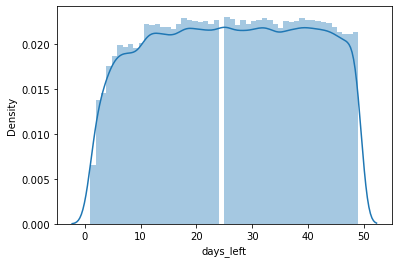

In [36]:
sns.distplot(df['days_left'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

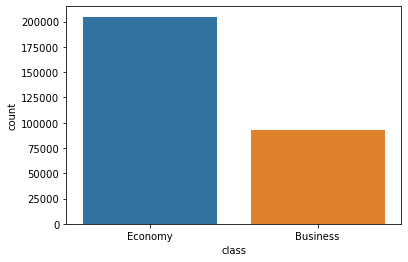

In [37]:
sns.countplot(df['class'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline', ylabel='count'>

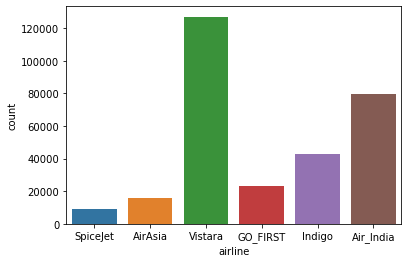

In [38]:
sns.countplot(df['airline'])

In [39]:
airline_df=df.groupby('airline')


In [40]:
label_df=airline_df.size().index


In [41]:
val_df=airline_df.size().values


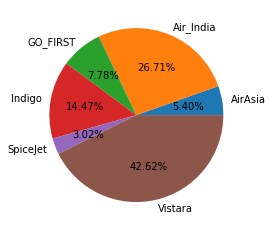

In [42]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline', ylabel='price'>

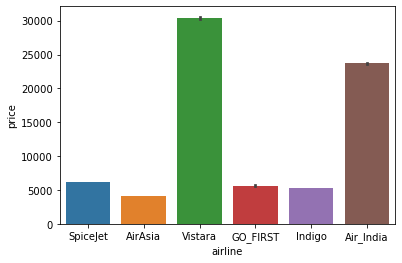

In [43]:
sns.barplot(df['airline'],df['price'])

In [44]:
label_df=df.groupby("airline")['price'].sum().index

In [45]:
val_df=df.groupby("airline")['price'].sum().values


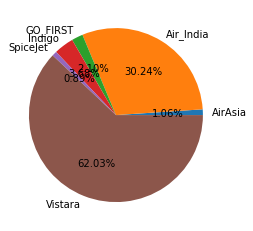

In [46]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='price'>

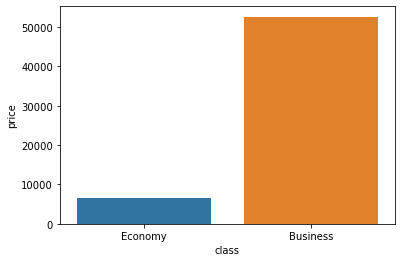

In [47]:
sns.barplot(df['class'],df['price'])

In [48]:
label_df=df.groupby("class")['price'].sum().index

In [49]:
val_df=df.groupby("class")['price'].sum().values


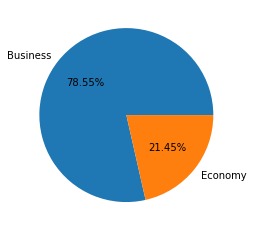

In [50]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_left', ylabel='price'>

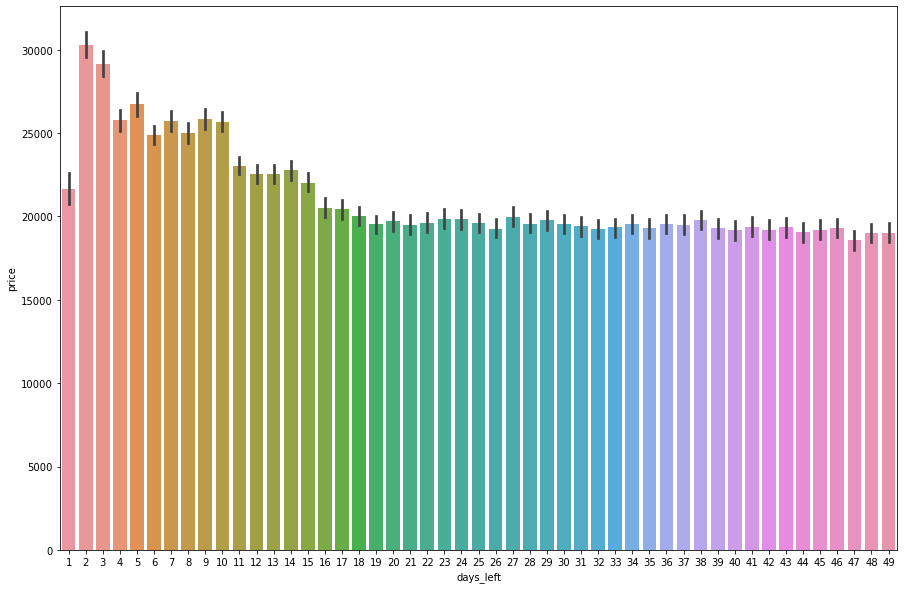

In [51]:
plt.figure(figsize=(15,10))
sns.barplot(df['days_left'],df['price'])


In [52]:
label_df=df.groupby("days_left")['price'].mean().index

In [53]:
val_df=df.groupby("days_left")['price'].mean().values


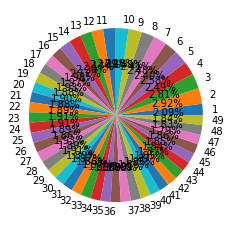

In [54]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='departure_time', ylabel='price'>

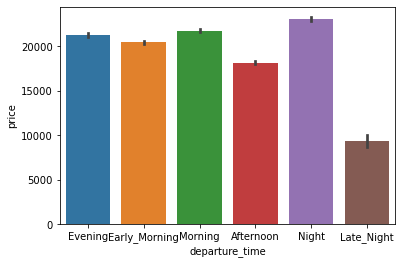

In [55]:
sns.barplot(x=df['departure_time'],y=df['price'])

In [56]:
label_df=df.groupby("departure_time")['price'].mean().index

In [57]:
val_df=df.groupby("departure_time")['price'].mean().values


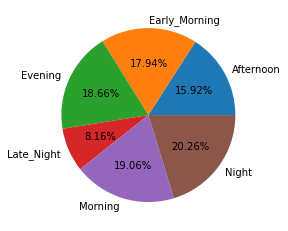

In [58]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline', ylabel='price'>

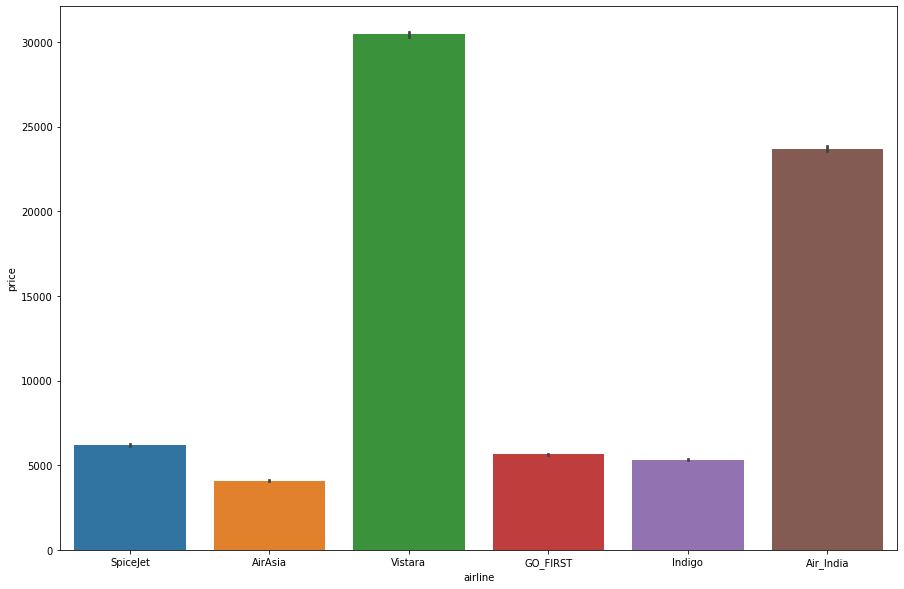

In [59]:
plt.figure(figsize=(15,10))
sns.barplot(df['airline'],df['price'])


In [60]:
label_df=df.groupby("airline")['price'].mean().index

In [61]:
val_df=df.groupby("airline")['price'].mean().values


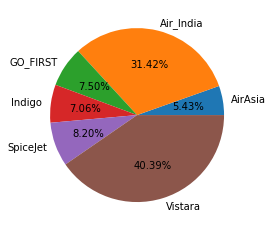

In [62]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='arrival_time', ylabel='price'>

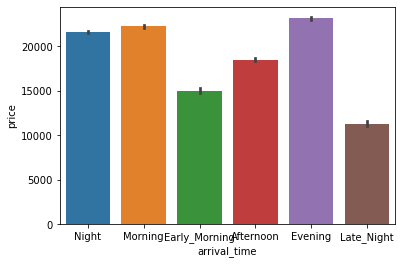

In [63]:
sns.barplot(x=df['arrival_time'],y=df['price'])

In [64]:
label_df=df.groupby("arrival_time")['price'].mean().index

In [65]:
val_df=df.groupby("arrival_time")['price'].mean().values


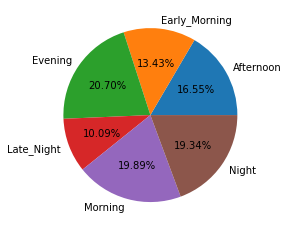

In [66]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='arrival_time', ylabel='count'>

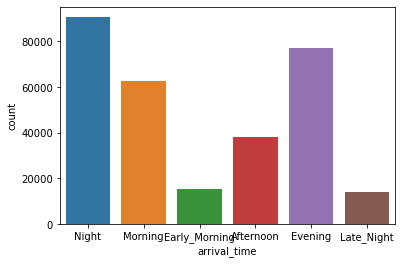

In [67]:
sns.countplot(df['arrival_time'])

In [68]:
label_df=df.groupby("arrival_time").size().index

In [69]:
val_df=df.groupby("arrival_time").size().values


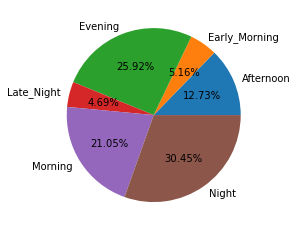

In [70]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='departure_time', ylabel='count'>

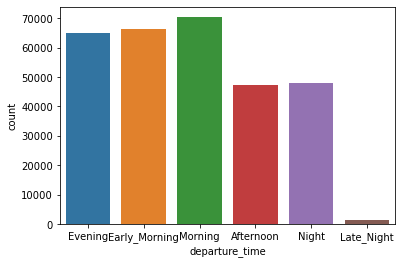

In [71]:
sns.countplot(df['departure_time'])

In [72]:
label_df=df.groupby("departure_time").size().index

In [73]:
val_df=df.groupby("departure_time").size().values


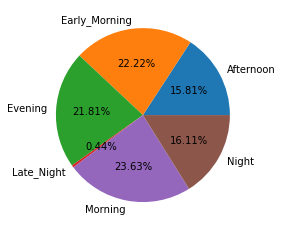

In [74]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='source_city', ylabel='count'>

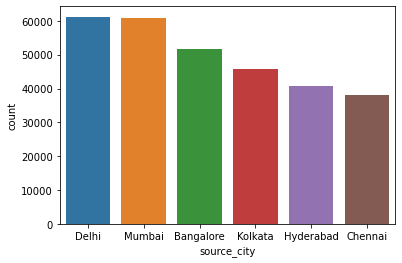

In [75]:
sns.countplot(df['source_city'])

In [76]:
label_df=df.groupby("source_city").size().index

In [77]:
val_df=df.groupby("source_city").size().values


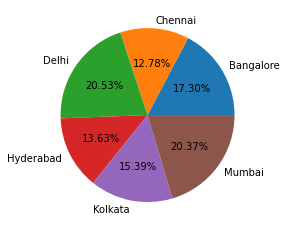

In [78]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='destination_city', ylabel='count'>

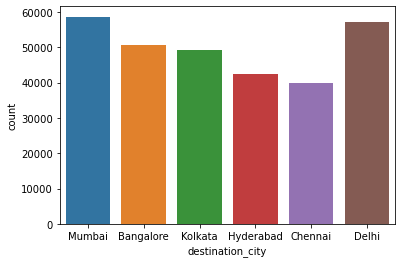

In [79]:
sns.countplot(df['destination_city'])

In [80]:
label_df=df.groupby("destination_city").size().index

In [81]:
val_df=df.groupby("destination_city").size().values


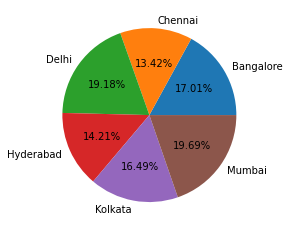

In [82]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [83]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [84]:
label_df=df.groupby(['source_city','destination_city'])['price'].sum().sort_values(ascending=False).index

In [85]:
val_df=df.groupby(['source_city','destination_city'])['price'].sum().sort_values(ascending=False).values

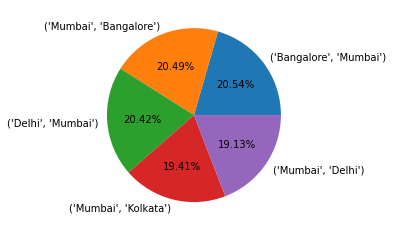

In [86]:
plt.pie(x=val_df[:5],labels=label_df[:5],autopct="%1.2f%%")
plt.show()

In [87]:
label_df=df.groupby(['source_city','destination_city'])['price'].sum().sort_values(ascending=False)

In [88]:
label_df

source_city  destination_city
Bangalore    Mumbai              297766816
Mumbai       Bangalore           297007941
Delhi        Mumbai              295931282
Mumbai       Kolkata             281401776
             Delhi               277303264
Delhi        Bangalore           250343799
Kolkata      Mumbai              248355474
Delhi        Kolkata             245125926
Bangalore    Delhi               243516100
             Kolkata             235004186
Mumbai       Chennai             230431772
Kolkata      Bangalore           219425682
Mumbai       Hyderabad           219366449
Chennai      Mumbai              211623524
Delhi        Chennai             207890596
Kolkata      Delhi               203786181
Hyderabad    Mumbai              201533560
Bangalore    Hyderabad           187014566
Chennai      Delhi               184234984
Kolkata      Hyderabad           169284426
Hyderabad    Bangalore           167593691
             Kolkata             165023007
Delhi        Hyderabad  

In [89]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


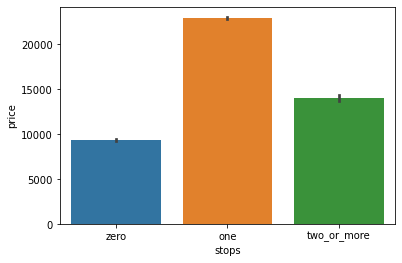

In [90]:
sns.barplot(df['stops'],df['price'])
plt.show()

In [91]:
label_df=df.groupby("stops")['price'].mean().index


In [92]:
val_df=df.groupby("stops")['price'].mean().values

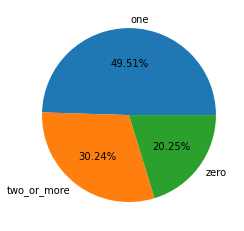

In [93]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stops', ylabel='count'>

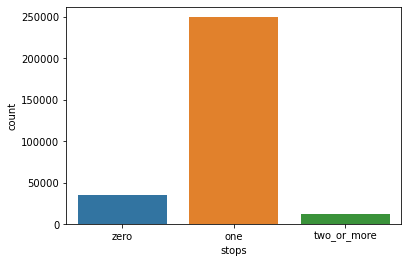

In [94]:
sns.countplot(df['stops'])

In [95]:
label_df=df.groupby("stops").size().index


In [96]:
val_df=df.groupby("stops").size().values

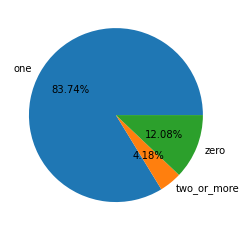

In [97]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [98]:
bang_to_delhi_df=df.groupby(['source_city','destination_city']).get_group(('Bangalore', 'Delhi'))


In [99]:
bang_to_delhi_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
84065,AirAsia,I5-996,Bangalore,Evening,zero,Night,Delhi,Economy,2.83,1,7489
84066,Vistara,UK-820,Bangalore,Evening,zero,Night,Delhi,Economy,2.67,1,7489
84067,Vistara,UK-802,Bangalore,Evening,zero,Night,Delhi,Economy,2.75,1,7489
84068,Indigo,6E-6139,Bangalore,Afternoon,zero,Evening,Delhi,Economy,2.75,1,7488
84069,Indigo,6E-2514,Bangalore,Evening,zero,Evening,Delhi,Economy,2.83,1,7488
...,...,...,...,...,...,...,...,...,...,...,...
248632,Vistara,UK-850,Bangalore,Evening,one,Morning,Delhi,Business,15.08,49,57081
248633,Vistara,UK-858,Bangalore,Early_Morning,one,Night,Delhi,Business,15.25,49,57081
248634,Vistara,UK-854,Bangalore,Evening,one,Morning,Delhi,Business,15.25,49,57081
248635,Vistara,UK-864,Bangalore,Evening,one,Morning,Delhi,Business,16.00,49,57081


In [100]:
label_df=bang_to_delhi_df.groupby('class').size().index


In [101]:
val_df=bang_to_delhi_df.groupby('class').size().values

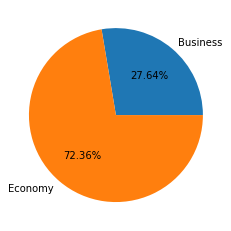

In [102]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

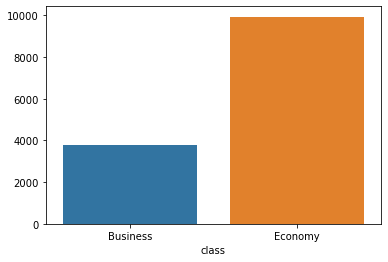

In [103]:
sns.barplot(x=label_df,y=val_df)
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stops', ylabel='count'>

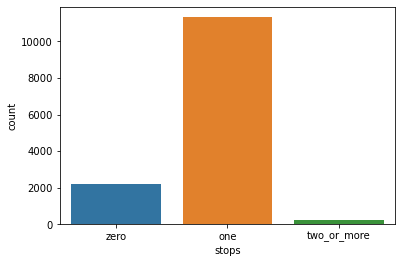

In [104]:
sns.countplot(bang_to_delhi_df['stops'])

In [105]:
label_df=bang_to_delhi_df.groupby('stops').size().index


In [106]:
val_df=bang_to_delhi_df.groupby('stops').size().values

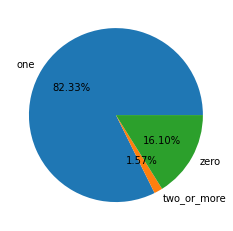

In [107]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='arrival_time', ylabel='count'>

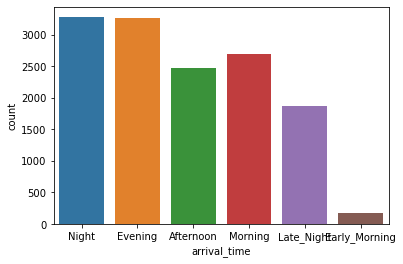

In [108]:
sns.countplot(bang_to_delhi_df['arrival_time'])

In [109]:
label_df=bang_to_delhi_df.groupby('arrival_time').size().index


In [110]:
val_df=bang_to_delhi_df.groupby('arrival_time').size().values

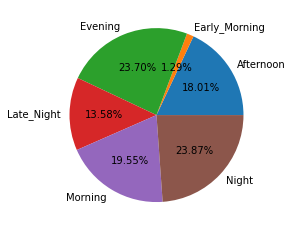

In [111]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline', ylabel='count'>

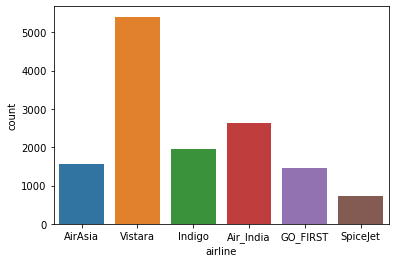

In [112]:
sns.countplot(bang_to_delhi_df['airline'])

In [113]:
label_df=bang_to_delhi_df.groupby('airline').size().index


In [114]:
val_df=bang_to_delhi_df.groupby('airline').size().values

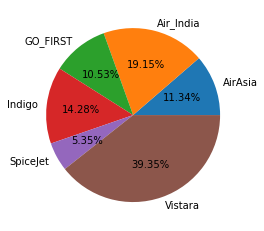

In [115]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='departure_time', ylabel='count'>

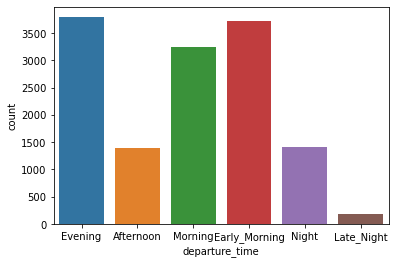

In [116]:
sns.countplot(bang_to_delhi_df['departure_time'])

In [117]:
label_df=bang_to_delhi_df.groupby('departure_time').size().index


In [118]:
val_df=bang_to_delhi_df.groupby('departure_time').size().values

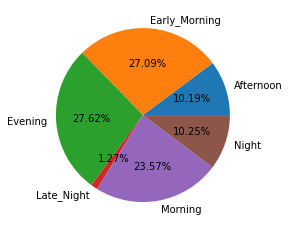

In [119]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='airline', ylabel='price'>

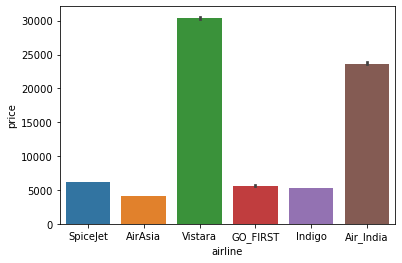

In [120]:
sns.barplot(x=df['airline'],y=df['price'])

In [121]:
label_df=bang_to_delhi_df.groupby('airline')['price'].mean().index


In [122]:
val_df=bang_to_delhi_df.groupby('airline')['price'].mean().values

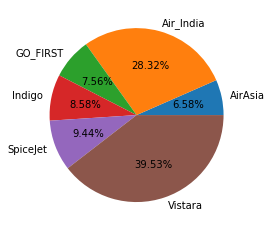

In [123]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='stops', ylabel='price'>

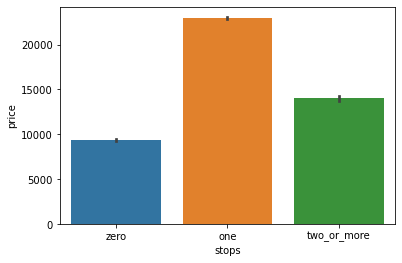

In [124]:
sns.barplot(x=df['stops'],y=df['price'])

In [125]:
label_df=bang_to_delhi_df.groupby('stops')['price'].mean().index


In [126]:
val_df=bang_to_delhi_df.groupby('stops')['price'].mean().values

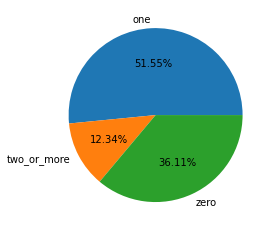

In [127]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='class', ylabel='price'>

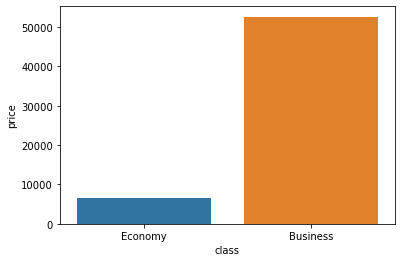

In [128]:
sns.barplot(x=df['class'],y=df['price'])

In [129]:
label_df=bang_to_delhi_df.groupby('class')['price'].mean().index


In [130]:
val_df=bang_to_delhi_df.groupby('class')['price'].mean().values

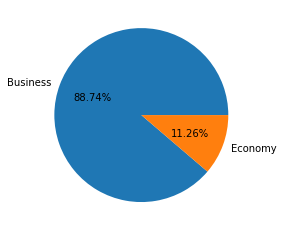

In [131]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Comapre prices for economy class with zero stops where arrival_time is night vs arrival_time is day

In [132]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [133]:
economy_df=df.groupby("class").get_group("Economy")


In [134]:
stop_zero_arrival_night_df=economy_df[(economy_df['stops']=='zero') & (economy_df['arrival_time']=='Night')]


In [135]:
night_df=stop_zero_arrival_night_df['price'].sum()


In [136]:
stop_zero_arrival_morning_df=economy_df[(economy_df['stops']=='zero') & (economy_df['arrival_time']=='Morning')]


In [137]:
morning_df=stop_zero_arrival_morning_df['price'].sum()

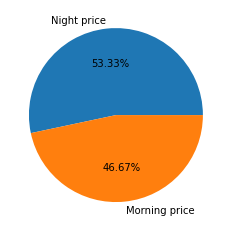

In [138]:
plt.pie(x=[night_df,morning_df],labels=['Night price','Morning price'],autopct="%1.2f%%")
plt.show()

In [139]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


<AxesSubplot:>

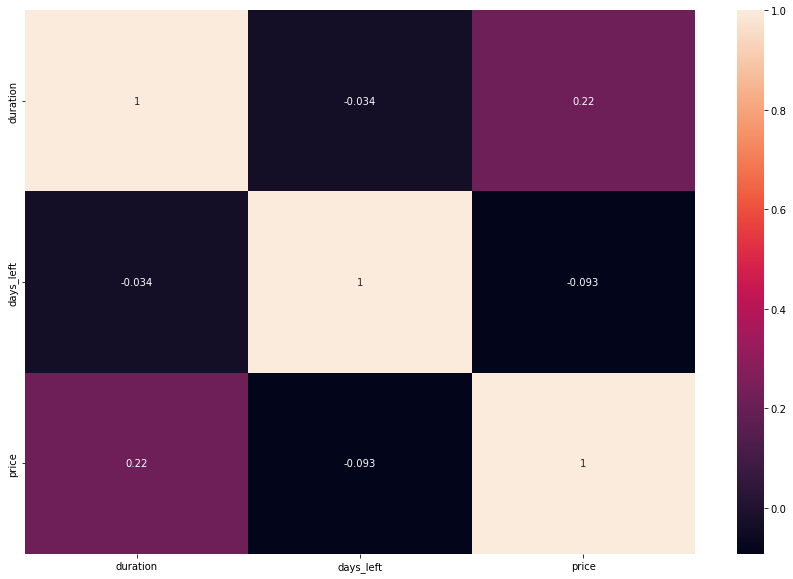

In [140]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)


In [141]:
le=LabelEncoder()


In [142]:
df['airline']=le.fit_transform(df['airline'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_35592\1495182481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline']=le.fit_transform(df['airline'])


In [143]:
df['source_city']=le.fit_transform(df['source_city'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_35592\870753396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['source_city']=le.fit_transform(df['source_city'])


In [144]:
df['departure_time']=le.fit_transform(df['departure_time'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_35592\3253379848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['departure_time']=le.fit_transform(df['departure_time'])


In [145]:
df['stops']=le.fit_transform(df['stops'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_35592\607409452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stops']=le.fit_transform(df['stops'])


In [146]:
df['arrival_time']=le.fit_transform(df['arrival_time'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_35592\3116196865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arrival_time']=le.fit_transform(df['arrival_time'])


In [147]:
df['destination_city']=le.fit_transform(df['destination_city'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_35592\3408696340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['destination_city']=le.fit_transform(df['destination_city'])


In [148]:
df['class']=le.fit_transform(df['class'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_35592\3286789376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class']=le.fit_transform(df['class'])


In [149]:
df['flight']=le.fit_transform(df['flight'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_35592\317556310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flight']=le.fit_transform(df['flight'])


In [150]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


In [151]:
y=df['price']

In [152]:
X=df.drop('price',axis=1)

In [153]:
X

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,1408,2,2,2,5,5,1,2.17,1
1,4,1387,2,1,2,4,5,1,2.33,1
2,0,1213,2,1,2,1,5,1,2.17,1
3,5,1559,2,4,2,0,5,1,2.25,1
4,5,1549,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49
300149,5,1481,1,0,0,5,3,0,10.42,49
300150,5,1486,1,1,0,5,3,0,13.83,49
300151,5,1483,1,1,0,2,3,0,10.00,49


In [154]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 298043, dtype: int64

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [156]:
X_train.shape

(199688, 10)

In [157]:
X_test.shape

(98355, 10)

In [158]:
rfr=RandomForestRegressor()


In [159]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [160]:
y_pred=rfr.predict(X_test)


In [161]:
r2_score(y_test,y_pred)

0.989031702661751

In [162]:
dtr=DecisionTreeRegressor()

In [163]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [164]:
y_pred=dtr.predict(X_test)


In [165]:
r2_score(y_test,y_pred)

0.9824910934118375

In [166]:
lr=LinearRegression()


In [167]:
lr.fit(X_train,y_train)

LinearRegression()

In [168]:
y_pred=lr.predict(X_test)


In [169]:
r2_score(y_test,y_pred)

0.9046899445933886

In [170]:
knr=KNeighborsRegressor()


In [171]:
knr.fit(X,y)

KNeighborsRegressor()

In [172]:
y_pred=knr.predict(X)

In [173]:
xgb_i=xgb.XGBRegressor()


In [174]:
xgb_i.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [175]:
y_pred=xgb_i.predict(X_test)

In [176]:
r2_score(y_test,y_pred)

0.983062994082419